# Integración numérica

**Integrar analíticamente, al contrario de derivar, no es una operación *algorítmica*,** es decir, no existe una manera de, dada una función, calcular su integral definida en un intervalo. 

Debido a esto, integrar analíticamente es mucho más dificil que derivar analíticamente. Más aún, existen funciones cuyas integrales, aunque existan, no se pueden expresar de manera simple.

Para atacar todos estos problemas, en análisis numérico se han desarrollado distintos métodos para calcular la integral de una función.

## Planteamiento del problema

Dada una función $f:[a,b] \to \mathbb{R}$ continua a pedazos (tiene a lo más un número numerable de discontinuidades), quiero calcular $\int_{a}^{b} f(s) ds$, que corresponde al área algebraica entre la función y el eje x

![](https://lh3.googleusercontent.com/KiLWWFTJW6EF3SNuzVS9nAmbA1xlwvPfZbfy0sTweVdrqlTsrpBP6rYzYVIGYMKAmVQ1_CouwBu0hR4rIaR467hmYXvDfSGD39wgcrLv0cwnPoMizRnEuNNcU2Dks3RKNbHBLjROyA=w400)

## ¿Cómo calculo una integral numéricamente?

Primero debemos recordar la definición de una integral sobre el intervalo $[a,b]$. 

### Particiones regulares
Sea $P = \{x_0=a, x_1, \ldots, x_{n-1}, x_n = b\}$. Decimos que $P$ es una **partición regular** de $[a,b]$ si y solo si, para toda $i$ se cumple que

1. $x_{i} < x_{i+1}$ 

2.  $x_{i+1} - x_{i} = h = \frac{b-a}{n}$

En este ejemplo, la partición tiene $n+1$ puntos y $n$ subintervalos. La función `np.linspace(a,b,n)` de python, como recordarán, construye un arreglo que corresponde a una partición regular de $[a,b]$ con $n-1$ subintervalos y n puntos. Estaremos continuamente recurriendo a esta función durante este notebook.

In [1]:
import numpy as np

In [2]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Sumas de Riemann

Primero la integral se aproxima mediante la suma de las áreas de varios rectángulos cuyas bases están sobre una partición regular del invervalo $[a,b]$

$$
\int_{a}^{b} f(s) ds \approx \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$. Notemos que la altura del rectángulo, dada por $f(\xi_i)$, es arbitraria. Para tener la integral, simplemente tomamos el límite cuando el número de puntos de la partición tiende a infinito:

$$
\int_{a}^{b} f(s) ds = \lim_{n \to \infty} \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = \lim_{n \to \infty} h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$


![](https://lh3.googleusercontent.com/-W_1UtNF8I6txqirGvNCW_aQI5lYB6vHOnAt9F1Pg7QSj8uUqaZPLwiAIUc-nxysR3x8hcNK-Kx8Mpn-M2OeqXJW5HZiv0skhmw0Hh67N3m5yCEZ5-IdC_nQngwprbDydmiue3d0EA=w400)

### Sumas importantes

Si **$f$ es continua**, sabemos que en cualquier intervalo cerrado alcanza su máximo y su mínimo. Así, podemos tomar como alturas de los rectángulos los valores máximos y mínimos de la función y así obtener:

#### Suma superior:

$$\xi_i = \text{argmax}_{x\in[x_{i-1},x_i]}{f(x)} \quad , \quad f(\xi_i) = \max_{x \in [x_{i-1},x_i]}{f(x)}$$

#### Suma inferior:

$$\xi_i = \text{argmin}_{x\in[x_{i-1},x_i]}{f(x)} \quad , \quad f(\xi_i) = \min_{x \in [x_{i-1},x_i]}{f(x)}$$



## ¿Podemos implementar una suma superior o inferior en la computadora? 

Generalmente **NO**: encontrar mínimos y máximos no es necesariamente sencillo y eso se tendría que hacer para cada subintervalo de la partición ($n$ veces), lo que haría la integración muy tardada.

## ¿Cómo calculamos entonces la integral? 

Ya que no podemos hacer sumas superiores o inferiores, lo más sencillo es tomar $\xi_i$ de manera que sea fácil calcular la integral en la computadora:

Recordamos que $\xi_i \in [x_{i-1},x_i]$

### Primera opción: $\xi_i = x_{i}$ (Integral rectangular hacia adelante)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_i)
$$

Tomar el punto $\xi_i = x_{i}$ corresponde a aproximar la integral como se muestra en la siguiente figura

<div>
<img src="https://math24.net/images/riemann-sum4.svg" width="300"/>
</div>



## Preludio computacional: diferencia entre los indices de la partición y de la lista de Python

Muchas veces, cuando planteamos un problema de manera matemática, la notación del problema puede incluir índices que nosotros también quisiéramos utilizar. Es importante recordar que **los índices en un objeto iterable en Python siempre empiezan en 0**. Para el caso de la partición, se cumple que:


- Partición: $\{x_0, x_1, x_2 \ldots, x_{n-1},x_n\}$.  
- Lista en python: $xx$

Si queremos representar todos los puntos de la partición en un arreglo, debemos notar que tendrán la siguiente correspondencia

$xx[0] = x_0$

$xx[1] = x_1$

.
.
.

$xx[i] = x_{i}$
.  
.  
.  

$xx[-1] =  xx[len(xx)] = x_{n}$

Es fundamental que dicha correspondencia se respete para no tener problemas entre lo teórico y lo computacional

In [5]:
def intAdelante(f,a,b,n):
    xx = np.linspace(a,b,n)
    integral = 0
    for i in range(n):
        integral = integral + f(xx[i])
    dx = (b-a)/(n-1.)
    integral = integral*dx
    return integral

Podemos probar nuestra implementación en la función $f(x) = \cos(2x)$

Analíticamente, sabemos que (chéquenle, chéquenle)

$$
\int_a^b \cos(2x) dx= \sin(x)\cos(x) \big|_a^b
$$

In [3]:
def prueba(x):
    return np.cos(2*x)

In [6]:
# con 10 subintervalos, o rectángulos, la aproximación es mala
print(intAdelante(prueba,0,np.pi/4,10))
# tomando más mejora 
print(intAdelante(prueba,0,np.pi/4,100))
print(intAdelante(prueba,0,np.pi/4,1000))

0.5423633471957212
0.5039561677663122
0.5003929891595635


________

### Sobre la convergencia del error

Si queremos ver como mejora nuestra integral conforme aumentemos el número de puntos que usamos ($n$), debemos calcular el valor para distintos valores de $n$. Para ello es necesario espaciar los valores $n$ a usar, no linealmente sino logaritmicamente, para así cubrir un rango más amplio.

En escala logaritmica, la separación entre $n_i$ y $n_{i+1}$ es

$$
\log(n_{i+1}) - \log(n_i)
$$

Si queremos que eso sea una constante, entonces pedimos que se cumpla la condición

$$
\log(n_{i+1}) - \log(n_i) = c
\\ 
\implies \log(\frac{n_{i+1}}{n_i})  = c
\\
\implies \frac{n_{i+1}}{n_i}  = 10^c
\\
\implies n_{i+1}  = (10^c)n_i
$$

Esto es equivalente a que hagamos lo siguiente: sea $n_{i+1} = 10^{m_{i+1}}$, $n_{i} = 10^{m_{i}}$, en este caso entonces:

$$
\log(n_{i+1}) - \log(n_i) = m_{i+1} - m_{i}
$$

Si se cumple que $m_{i+1} - m_{i} = c$ para toda $i$, entonces en escala logarítmica los puntos estarán separados linealmente

**Conclusión**: hay que generar puntos de la forma $n_i = 10^{m_i}$ con los $m_i$ separados linealmente

In [46]:
# seleccionamos ns espaciadas logaritmicamente
# generamos exponentes linealmente espaciados
expns = np.linspace(1,4,30)
# ns va a guardar mis ns (los distintos numeros de subintervalos)
# todos los elementos de n deben ser enteros, por lo que debemos redondearlos hacia arriba con la función
# ceil (función techo) y luego convertirlos a enteros con la función Int64()
nn = [int(np.ceil(10**k)) for k in expns]
print(nn)
errores = [abs(intAdelante(prueba,0,np.pi/4,n)-.5) for n in nn]

[10, 13, 17, 21, 26, 33, 42, 53, 68, 86, 109, 138, 175, 222, 281, 357, 453, 574, 728, 924, 1173, 1488, 1888, 2396, 3040, 3857, 4894, 6211, 7881, 10000]


Grafiquemos esto para una mejor visualización

In [2]:
import matplotlib.pyplot as plt

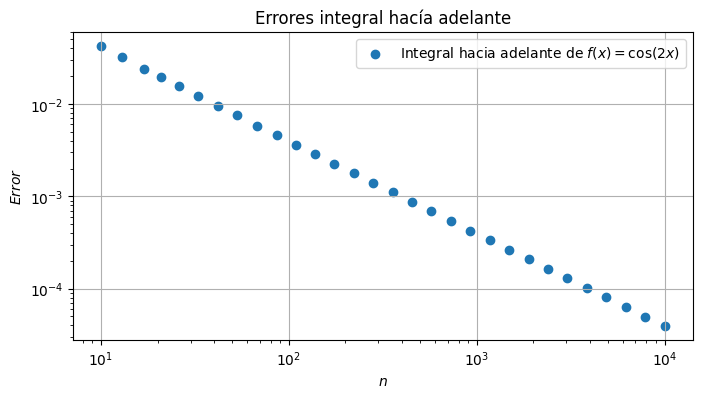

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(nn,errores,label="Integral hacia adelante de $f(x)=\cos(2x)$")
plt.title("Errores integral hacía adelante")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$Error$")
plt.grid()
plt.show()

_____
#### Ejercicio 1

Resuelve las siguientes dos integrales utilizando la regla de integración hacia adelante:

1. $$\int_{0}^{1} e^{x^2} \; \mathrm{d} x \approx 1.462651746$$



2. $$\int_{0}^{\pi} \ln{\left(1 - 2 e \cos{x}+ e^2 \right) } \; \mathrm{d} x = 2\pi$$

$e$ es el número de Euler (pueden usar `np.e`).

Usando el resultado que se muestra, grafica el error absoluto como función del número de puntos de la partición $n$ y discute cuál es la velocidad de convergencia del error.  

Recuerda que una linea recta en escala log-log implica que:

$$\log(y) = m+a\log(x)\rightarrow y = Ax^a \rightarrow y \propto x^a.$$

Si $y$ es el error y $n$ el número de puntos, decimos que el error es de orden $a$ (primer order, segundo orden, etc.) respecto a $n$. Notemos que aquí no estamos calculando errores relativos, entonces no estamos obteniendo información resecto al tamaño de los errores sino sobre su comportamiento respecto a aumentar o disminuir el número de puntos usados.

In [12]:
def fun1(x):
    return np.e**x**2

In [27]:
print(intAdelante(fun1,0,1,10000))

1.4628376831232537


In [47]:
errores_f1 = [abs(intAdelante(fun1,0,1,n)-1.462651746) for n in nn]

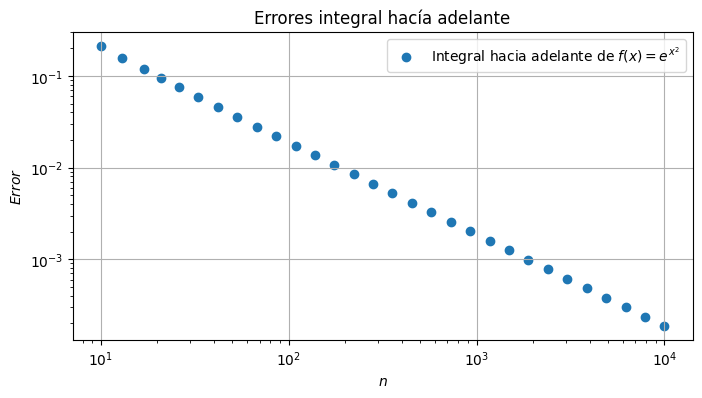

In [54]:
plt.figure(figsize=(8,4))
plt.scatter(nn,errores_f1,label="Integral hacia adelante de $f(x)=e^{x^2}$")
plt.title("Errores integral hacía adelante")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$Error$")
plt.grid()
plt.show()

In [36]:
def fun2(x):
    return np.log(1-2*np.e*np.cos(x)+np.e**2)

In [40]:
print(intAdelante(fun2,0,np.pi,10000))

6.283768000994603


In [49]:
errores_f2 = [abs(intAdelante(fun2,0,np.pi,n)-2*np.pi) for n in nn]

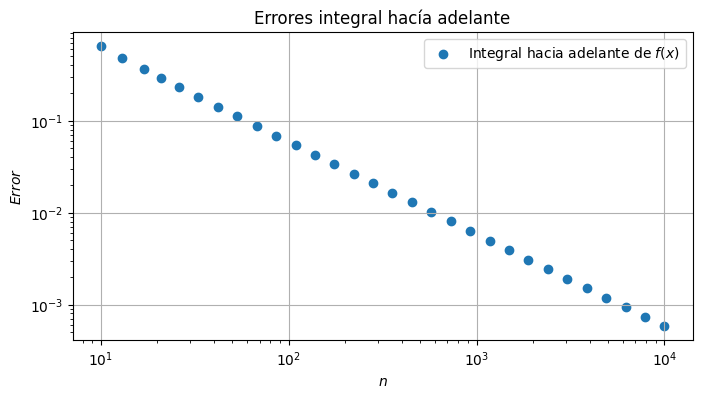

In [50]:
plt.figure(figsize=(8,4))
plt.scatter(nn,errores_f2,label="Integral hacia adelante de $f(x)$")
plt.title("Errores integral hacía adelante")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$Error$")
plt.grid()
plt.show()

_____

## Otras opciones para definir integrales mediante sumas de Riemman:

### Segunda opción: $\xi_i = x_{i-1}$ (Integral rectangular hacia atras)


$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_{i-1})
$$

____
#### Ejercicio 2

Implementa una función `intAtrás(f,a,b,n)` regrese el valor la integral $\int_a^b f(s) \; ds$ calculado utilizando la fórmula de la integral rectangular hacia atrás con $n$ subintervalos. Prueba tu función integrando la función  `prueba`.

In [93]:
def intAtrás(f,a,b,n):
    xx = np.linspace(a,b,n)
    integral = 0
    for i in range(1,n+1):
        integral = integral + f(xx[i-1])
    dx = (b-a)/(n-1.)
    integral = integral*dx
    return integral

In [94]:
print(intAtrás(prueba,0,np.pi/4,10))

0.5423633471957212


___
### Tercera opción: tomar el punto medio $\xi_i = \frac{x_{i-1} + x_{i}}{2}$ (Integral rectangular Centrada o regla rectangular)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f\left( \frac{x_{i-1} + x_{i}}{2} \right) 
$$

______
#### Ejercicio 3

Implementa una función `intCentrada(f,a,b,n)` regrese el valor la integral $\int_a^b f(s) \; ds$ calculado utilizando la fórmula de la regla centrada con $n$ subintervalos. Prueba tu función integrando la función  `prueba`.

In [90]:
def intCentrada(f,a,b,n):
    xx = np.linspace(a,b,n)
    integral = 0
    for i in range(1,n):
        integral = integral + f((xx[i-1]+xx[i])/2)
    dx = (b-a)/(n-1.)
    integral = integral*dx
    return integral

In [91]:
print(intCentrada(prueba,0,np.pi/4,10))

0.50063518391656


____
#### Ejercicio 4

Repite el ejercicio 1 pero ahora utilizando las reglas de integración del ejercicio 2 y 3. ¿la tasa de convergencia mejora con las nuevas reglas?

In [95]:
errores_f1_a = [abs(intAtrás(fun1,0,1,n)-1.462651746) for n in nn]
errores_f1_c = [abs(intCentrada(fun1,0,1,n)-1.462651746) for n in nn]

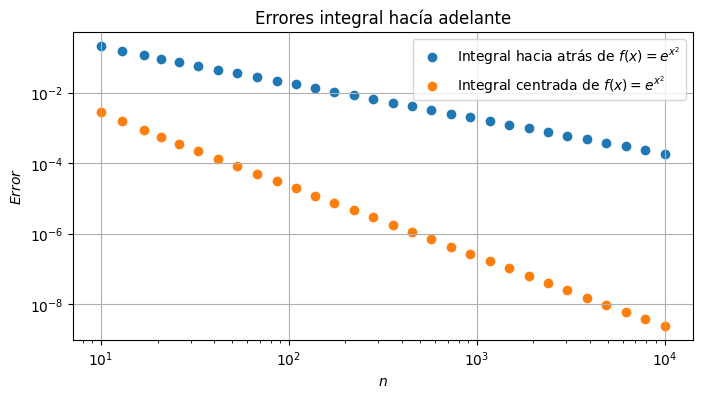

In [97]:
plt.figure(figsize=(8,4))
plt.scatter(nn,errores_f1_a,label="Integral hacia atrás de $f(x)=e^{x^2}$")
plt.scatter(nn,errores_f1_c,label="Integral centrada de $f(x)=e^{x^2}$")
plt.title("Errores integral hacía adelante")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$Error$")
plt.grid()
plt.show()

In [98]:
errores_f2_a = [abs(intAtrás(fun2,0,1,n)-1.462651746) for n in nn]
errores_f2_c = [abs(intCentrada(fun2,0,1,n)-1.462651746) for n in nn]

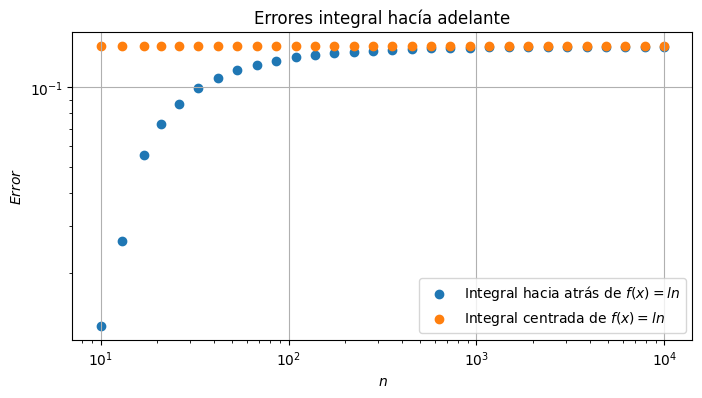

In [100]:
plt.figure(figsize=(8,4))
plt.scatter(nn,errores_f2_a,label="Integral hacia atrás de $f(x)=ln$")
plt.scatter(nn,errores_f2_c,label="Integral centrada de $f(x)=ln$")
plt.title("Errores integral hacía adelante")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$Error$")
plt.grid()
plt.show()

_______
## Aproximación más compleja: regla trapezoidal

Notemos que todas las aproximaciones rectangulares de la integral, por su construcción a partir de sumas de Riemann, aproximaban a la función $f(x)$ en cada intervalo $[x_{i-1},x_{i}]$ como una función constante, es decir, un **polinomio de grado 0**. 

Una aproximación más compleja para la función en dicho intervalo sería aproximar a la función no como una constante si no como una recta (o un **polinomio de grado 1**) que pasa por los puntos $(x_{i-1},f(x_{i-1}))$ y $(x_{i},f(x_{i}))$. Así, el area de la integral se aproxima como la siguiente figura


<div>
<img src="https://mathlake.com/uploads/images/1c7959f2e222b606eeb6fa0508a2f4a2.svg" width="500"/>
</div>

______
#### Ejercicio 5

Deduce la fórmula para el valor de $\int_{x_{i-1}}^{x_{i}} f(s) \; ds$ cuando aproximamos la función como una recta. Es decir, da la fórmula para el área del trapecio en un intervalo $[x_{i-1},x_{i}]$ de la figura anterior. La fórmula solo debe depender de $x_{i-1},f(x_{i-1}), x_{i},f(x_{i})$

In [1]:
#Poner fórmula del valor medio para integrales

____
### Planteamiento de la regla

De lo obtenido del ejercicio anterior para crear una nueva regla de integración. Recordando que, dada una partición regular de orden $n$, se cumple que 

$$
\int_{a}^b f(s) \; ds = \sum_{i=1}^{n} \int_{x_{i-1}}^{x_{i}} f(s) \; ds
$$

Podemos entonces utilizar la fórmula de $\int_{x_{i-1}}^{x_{i}} f(s) \; ds$ que encontramos en el ejercicio anterior para calcular la integral en todo el intervalo $[a,b]$. A este método de cálculo de la integral se le llama la **regla trapezoidal**

_______
#### Ejercicio 6

Escribe una función `intTrapezoidal(f,a,b,n)` que regresa el valor de la integral $\int_{a}^b f(s) \; ds$ calculado utilizando la regla trapezoidal. Es decir, que para cada integral $\int_{x_{i-1}}^{x_{i}} f(s) \; ds$ se calcula como el area de un trapecio.

_______
#### Ejercicio 7

Repite el ejercicio 1 utilizando ahora la regla de integración trapezoidal. ¿Mejora la tasa de convergencia?

_______

# Derivacion numérica

Antes de comenzar con la derivación numérica, recordemos el teorema de Taylor

### Teorema de Taylor

Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable $k$ veces en un punto $a$. Entonces :

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k + R_{k}(x)
$$

Y $R_{k}(x)$ cumple que

$$
\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 \quad \left( R_k(x) \sim (x-a)^{k+1}\right).
$$

En forma aproximada, se cumple que:
$$
f(x) \approx f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k.
$$

Modifiquemos un poco esta expresión. Sustituyendo $x-a = h \implies x = a+h$, obtenemos

$$
f(a+h) = f(a) + f'(a)(h)+ \frac{f''(a)}{2!} (h)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(h)^k + R_{k}(a+h),
$$

donde $R_{k}(a+h)$ cumple que

$$
\lim_{h\to 0} \frac{R_{k}(a+h)}{h^k} = 0 \quad \left( R_k(a+h) \sim h^{k+1}\right).
$$

### ¿Cómo aproximar la derivada?

$$
f'(a) = \lim_{h\to 0 } \frac{f(a+h) - f(a)}{h}
$$

No podemos hacer limites en la computadora. ¿Qué hacemos? **Usar polinomios de taylor y despejar la derivada**:  **diferencias finitas**

Mientras más pequeño sea el valor de $h$, mejor será nuestra aproximación.

### Primera aproximación: diferencia hacia adelante (forward difference)

Sea $h > 0$, $h << a$

$$
f(a+h) = f(a) + f'(a)h + R_{1}(a+h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h)-f(a)}{h} - \frac{R_{1}(a+h)}{h} \approx \frac{f(a+h)-f(a)}{h}
$$

$$
\lim_{h \to 0} \frac{R_1(a+h)}{h} = 0
$$

In [4]:
def diferenciaAdelante(f,a,h):
    return (f(a+h) - f(a))/h

#### Ejemplo:
$f(x) = \sin{x}$, $f'(x) = \cos{x}$

Sea $a = 0$. $f(a) = 0$, $f'(a) = 1$

In [5]:
diferenciaAdelante(np.sin,0,0.1)

0.9983341664682815

In [6]:
diferenciaAdelante(np.sin,0,0.01)

0.9999833334166665

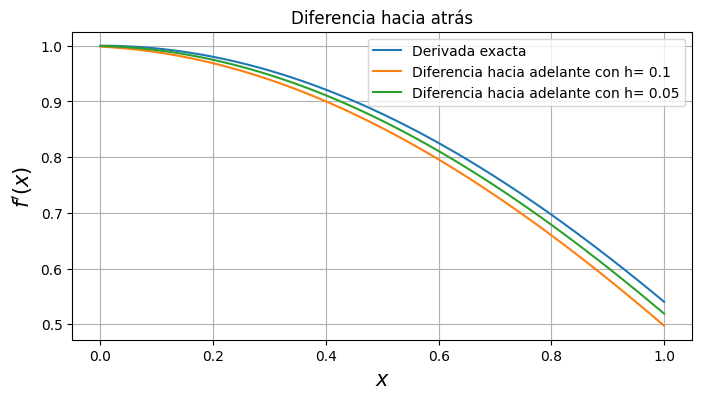

In [6]:
xx = np.linspace(0,1,100)
yy1 = [np.cos(a) for a in xx]
yy2 = [diferenciaAdelante(np.sin,a,0.1) for a in xx]
yy3 = [diferenciaAdelante(np.sin,a,0.05) for a in xx]
fig = plt.figure(figsize=(8,4))
plt.plot(xx,yy1,label = "Derivada exacta")
plt.plot(xx,yy2,label="Diferencia hacia adelante con h= 0.1")
plt.plot(xx,yy3,label="Diferencia hacia adelante con h= 0.05")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f\'(x)$",fontsize=15)
plt.grid()
plt.legend()
plt.title("Diferencia hacia atrás")
plt.show()

## Otras aproximaciones

### Diferencia hacia atrás (backwards difference)

Sea $h > 0$, $h << a$

$$
f(a-h) = f(a) + f'(a)(-h) + R_{1}(a-h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a-h)-f(a)}{-h} - \frac{R_{1}(a-h)}{-h} = \frac{f(a)-f(a-h)}{h} + \frac{R_{1}(a-h)}{h}
$$

$$
f'(a) \approx \frac{f(a)-f(a-h)}{h} 
$$

$$
\lim_{h \to 0} \frac{R_1(a-h)}{h} = 0
$$

_______
#### Ejercicio 8

i) Implementa una función que calcula la derivada de una función, pero ahora usando diferencia hacía atras.  
ii) Prueba tu función para alguna función de tu elección Y haz una gráfica similar a la que hicimos en el ejemplo de derivada hacía adelante en la que compres un par de valores distintos de `h` y la derivada analítica.

In [41]:
def diferenciaAtras(f,a,h):
    return (f(a) - f(a-h))/h

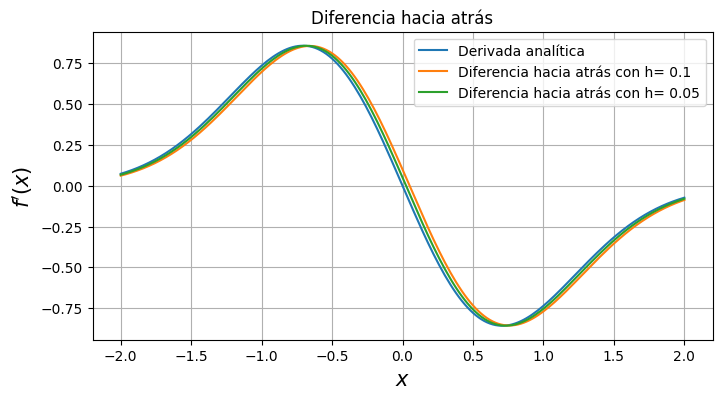

In [22]:
xx = np.linspace(-2,2,201)
ff1 = np.exp(-xx**2)

def fe8(x):
    return np.exp(-x**2)

yy1 = np.exp(-xx**2)*(-2*xx)
yy2 = [diferenciaAtras(fe8,a,0.1) for a in xx]
yy3 = [diferenciaAtras(fe8,a,0.05) for a in xx]
fig = plt.figure(figsize=(8,4))
plt.plot(xx,yy1,label = "Derivada analítica")
plt.plot(xx,yy2,label="Diferencia hacia atrás con h= 0.1")
plt.plot(xx,yy3,label="Diferencia hacia atrás con h= 0.05")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f\'(x)$",fontsize=15)
plt.grid()
plt.legend()
plt.title("Diferencia hacia atrás")
plt.show()

_____

### Diferencia centrada (central difference)

$$
f(a+h) = f(a) + f'(a) h + \frac{f''(a)}{2!} h^2 + R_2 (a+h)
$$


$$
\begin{split}
f(a-h) &= f(a) + f'(a)(- h) + \frac{f''(a)}{2!} (-h)^2 + R_2 (a-h) \\
&= f(a) - f'(a)h + \frac{f''(a)}{2!} h^2 + R_2 (a-h)
\end{split}
$$

Podemos restar ambas aproximaciones:

$$
\begin{split}
f(a+h) - f(a-h) &= (f(a) - f(a)) + (f'(a)h - (-f'(a) h)) + (\frac{f''(a)}{2!} h^2 - \frac{f''(a)}{2!} h^2) +  (R_2(a+h) - R_2(a-h)) \\
 &=  2 f'(a) h + (R_2(a+h) - R_2(a-h))
\end{split}
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h) - f(a-h)}{2h} - \frac{R_2(a+h) - R_2(a-h)}{2h} \approx \frac{f(a+h) - f(a-h)}{2h}
$$

$$
\lim_{h \to 0} \frac{R_2(a+h) - R_2(a-h)}{2h} = 0
$$

#### Ejercicio 9

i) Implementa una función que calcula la derivada de una función, pero ahora usando diferencia centrada.  
ii) Prueba tu función para alguna función de tu elección Y haz una gráfica similar a la que hicimos en el ejemplo de derivada hacía adelante en la que compres un par de valores distintos de `h` y la derivada analítica.

In [44]:
def diferenciaCentral(f,a,h):
    return (f(a+h)-f(a-h))/(2*h)

In [2]:
xx = np.linspace(-5,5,500)
ff1 = xx**3-4*xx**2

def fe3(x):
    return x**3-4*x**2

yy1 = 3*xx**2-4*xx
yy2 = [diferenciaCentral(fe3,a,0.1) for a in xx]
yy3 = [diferenciaCentral(fe3,a,0.05) for a in xx]
fig = plt.figure(figsize=(8,4))
plt.plot(xx,yy1,label = "Derivada analítica")
plt.plot(xx,yy2,label="Diferencia centrada con h= 0.1")
plt.plot(xx,yy3,label="Diferencia centrada con h= 0.05")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f\'(x)$",fontsize=15)
plt.grid()
plt.legend()
plt.title("Diferencia centrada")
plt.show()

NameError: name 'np' is not defined

#### Ejercicio 10

i) Usa cada uno de los tres métodos que aprendimos para calcular la derivada numérica para calcular la derivada de 

$$f(x) = x^3 + 20\sin(2x) - 5x$$

en el intervalo $[-\pi,\pi]$. Para ello haz una gráfica como las de los ejercicios anteriores. Usa el mismo valor de `h` para cada método. Además, escoge un número adecuado de puntos para que tu gráfica se vea bien.

ii). Grafica el error para cada método en la misma figura.

In [48]:
def f10(x):
    return x**3+20*np.sin(2*x)-5*x

def fp10(x):
    return 3*x**2+20*np.cos(2*x)*2-5

gráfica de derivada

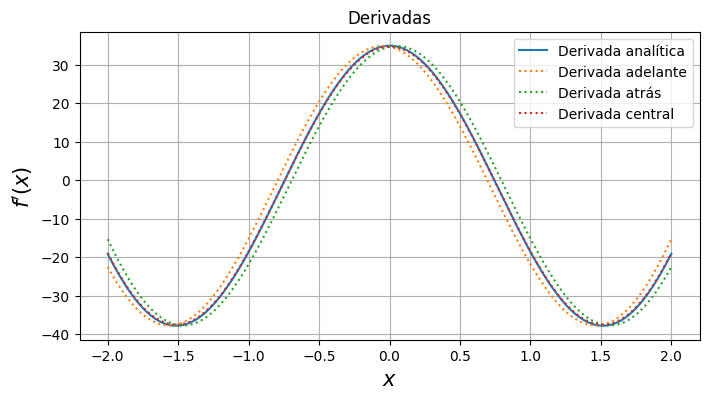

In [59]:
xx = np.linspace(-2,2,201)

yy_a = fp10(xx)
yy_ad = [diferenciaAdelante(f10,a,0.1) for a in xx]
yy_at = [diferenciaAtras(f10,a,0.1) for a in xx]
yy_ce = [diferenciaCentral(f10,a,0.1) for a in xx]


fig = plt.figure(figsize=(8,4))

plt.plot(xx,yy_a,label = "Derivada analítica")
plt.plot(xx,yy_ad,label = "Derivada adelante",ls=":")
plt.plot(xx,yy_at,label= "Derivada atrás", ls=":")
plt.plot(xx,yy_ce,label= "Derivada central",ls=":")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f\'(x)$",fontsize=15)
plt.grid()
plt.legend()
plt.title("Derivadas")
plt.show()

In [4]:
xx = np.linspace(-2,2,201)

yy_a = fp10(xx)
yy_ad = np.array([diferenciaAdelante(f10,a,0.1) for a in xx])
yy_at = np.array([diferenciaAtras(f10,a,0.1) for a in xx])
yy_ce = np.array([diferenciaCentral(f10,a,0.1) for a in xx])


plt.figure(figsize=(8,6))
plt.plot(xx,abs(yy_ad-yy_a),label = "Error adelante",ls=":")
plt.plot(xx,abs(yy_at-yy_a),label= "Error atras", ls=":")
plt.plot(xx,abs(yy_ce-yy_a),label= "Error central",ls=":")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.grid()
plt.legend()
plt.title("Derivadas")
plt.show()
plt.xlabel("$x$",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.grid()
plt.legend()
plt.title("Derivadas")
plt.show()

NameError: name 'np' is not defined